In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, HashingVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
# import xgboost as xgb
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV, LinearRegression, Ridge, ElasticNet, LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score, f1_score

font2 = {"size":20, "weight":"normal"}

data = pd.read_csv("toxiccomments_train.csv")
data = data.dropna()

ID = data["id"]
identity_hate = data["identity_hate"]
comment_text = data['comment_text']
has = HashingVectorizer().fit(comment_text)
features = has.fit_transform(comment_text)



label = identity_hate



X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=0)

In [3]:
#本次改用分类模型，进行对比，观测模型的精准率，召回率，f1得分等，根据观测结果，观测采用回归模型较好
#采用支持向量机分类模型
svc = SVC()                 #Revoke the model SVC     
svc.fit(X_train, y_train)   #Fit the train dataset
y_predict = svc.predict(X_test) #Predict the result by utilizing the SVC model
print('SVC precision score：',precision_score(y_test,y_predict, average='micro'))
print('SVC Confusion Matrix：',confusion_matrix(y_test,y_predict))
print('SVC accuracy score：',accuracy_score(y_test,y_predict))
print('SVC recall score：',recall_score(y_test,y_predict,  average="micro", sample_weight=None))
print('SVC f1 score：',f1_score(y_test,y_predict, pos_label=1,average = "macro"))



E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC precision score： 0.9908379916276039
SVC Confusion Matrix： [[79055     0]
 [  731     0]]
SVC accuracy score： 0.9908379916276039
SVC recall score： 0.9908379916276039
SVC f1 score： 0.49769895681845366


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [4]:
from sklearn.linear_model import  LogisticRegression
#采用逻辑回归分类模型
Logistic_regress = LogisticRegression(C=1e5)
Logistic_regress.fit(X_train, y_train)
# 5. 预测
y_predict = Logistic_regress.predict(X_test)
print('Logistic_regress precision score：',precision_score(y_test,y_predict, average='micro'))
print('Logistic_regress Confusion Matrix：',confusion_matrix(y_test,y_predict))
print('Logistic_regress accuracy score：',accuracy_score(y_test,y_predict))
print('Logistic_regress recall score：',recall_score(y_test,y_predict,  average="micro", sample_weight=None))
print('Logistic_regress f1 score：',f1_score(y_test,y_predict, pos_label=1,average = "macro"))

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic_regress precision score： 0.9855363096282556
Logistic_regress Confusion Matrix： [[78424   631]
 [  523   208]]
Logistic_regress accuracy score： 0.9855363096282556
Logistic_regress recall score： 0.9855363096282556
Logistic_regress f1 score： 0.628832223924925


In [5]:
from sklearn.ensemble import RandomForestClassifier ##
# 随机森林分类模型
RandomForest = RandomForestClassifier(n_estimators=150,min_samples_leaf=2,max_depth=6,oob_score=True)
RandomForest.fit(X_train, y_train)
y_predict = RandomForest.predict(X_test)
print('RandomForest precision score：',precision_score(y_test,y_predict, average='micro'))
print('RandomForest Confusion Matrix：',confusion_matrix(y_test,y_predict))
print('RandomForest accuracy score：',accuracy_score(y_test,y_predict))
print('RandomForest recall score：',recall_score(y_test,y_predict,  average="micro", sample_weight=None))
print('RandomForest f1 score：',f1_score(y_test,y_predict, pos_label=1,average = "macro"))

RandomForest precision score： 0.9908379916276039
RandomForest Confusion Matrix： [[79055     0]
 [  731     0]]
RandomForest accuracy score： 0.9908379916276039
RandomForest recall score： 0.9908379916276039
RandomForest f1 score： 0.49769895681845366


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


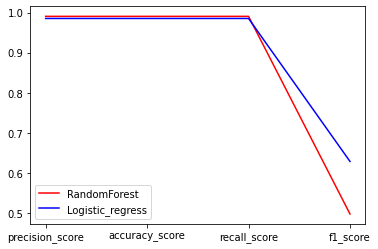

In [6]:
randomforest_predict = RandomForest.predict(X_test)
RandomForest_store = [precision_score(y_test,randomforest_predict, average='micro'),accuracy_score(y_test,randomforest_predict) ,recall_score(y_test,randomforest_predict,  average="micro", sample_weight=None)
                        ,f1_score(y_test,randomforest_predict, pos_label=1,average = "macro")     ]
x = ["precision_score", "accuracy_score", "recall_score","f1_score" ]
plt.plot(x, RandomForest_store, color = "red", label ="RandomForest" )


Logistic_regress_predict = Logistic_regress.predict(X_test)
Logistic_regress_store = [precision_score(y_test,Logistic_regress_predict, average='micro'),accuracy_score(y_test,Logistic_regress_predict) ,recall_score(y_test,Logistic_regress_predict,  average="micro", sample_weight=None)
                        ,f1_score(y_test,Logistic_regress_predict, pos_label=1,average = "macro")]
x = ["precision_score", "accuracy_score", "recall_score","f1_score" ]
plt.plot(x, Logistic_regress_store, color = "blue", label ="Logistic_regress" )



plt.legend()
plt.show()


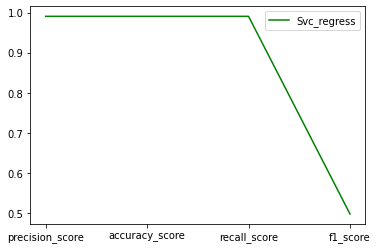

In [7]:
svc_predict = svc.predict(X_test)
svc_store = [precision_score(y_test,svc_predict, average='micro'),accuracy_score(y_test,svc_predict) ,recall_score(y_test,svc_predict,  average="micro", sample_weight=None)
                        ,f1_score(y_test,svc_predict, pos_label=1,average = "macro")]
x = ["precision_score", "accuracy_score", "recall_score","f1_score" ]
plt.plot(x, svc_store, color = "green", label ="Svc_regress" )
plt.legend()
plt.show()

In [9]:
ID_data = data['id']
fea_csv = HashingVectorizer().fit(data['comment_text'])
fea_csv = fea_csv.fit_transform(data['comment_text'])
ID_csv = pd.DataFrame({"id":ID_data, "prediction":svc.predict(fea_csv)})
for i in range(len(ID_csv)):
    if ID_csv["prediction"][i]>0.5:
        ID_csv["prediction"][i] = True
    else:
        ID_csv["prediction"][i]  = False
print("ID_csv = ", ID_csv)
ID_csv.to_csv("toxiccomments_submission2.csv")

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


ID_csv =                        id prediction
0       0000997932d777bf      False
1       000103f0d9cfb60f      False
2       000113f07ec002fd      False
3       0001b41b1c6bb37e      False
4       0001d958c54c6e35      False
...                  ...        ...
159566  ffe987279560d7ff      False
159567  ffea4adeee384e90      False
159568  ffee36eab5c267c9      False
159569  fff125370e4aaaf3      False
159570  fff46fc426af1f9a      False

[159571 rows x 2 columns]
